# Goal

The goal of this blog post is to evaluate different time series forecasting techniques using real-world data that contains many erratic behaviour that out-of-the-box forecasting tools struggle with. We will evaluate classic statistical, machine learning and deep learning methods to discover how well these methods work in practice.

The dataset to do our analysis is a portfolio of hourly consumption data that contains many different patterns such as a change in portfolio, multiple seasonalities and limited data.

# Data


In [13]:
import pandas as pd

df = pd.read_parquet("../data/consumption.parquet")

<Axes: xlabel='time'>

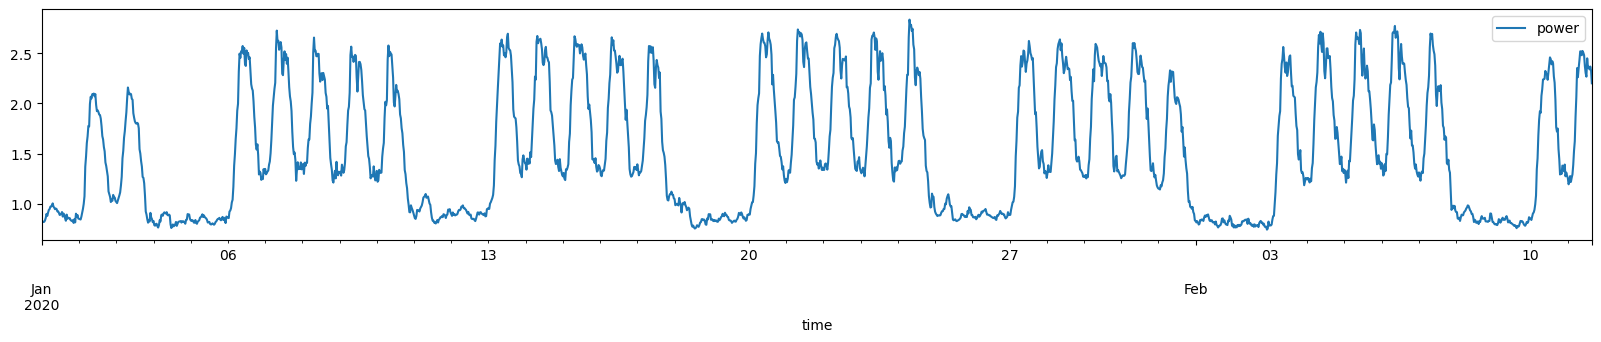

In [14]:
df.iloc[:2000, :].plot(figsize=(20, 3))

In [15]:
from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA

In [16]:
mstl = MSTL(
    season_length=[2 * 24, 2 * 24 * 7],  # seasonalities of the time series
    trend_forecaster=AutoARIMA(),  # model used to forecast trend
)

In [17]:
sf = StatsForecast(
    models=[mstl],  # model used to fit each time series
    freq="30T",  # frequency of the data
)

In [18]:
df = (
    df.reset_index()
    .rename(columns={"time": "ds", "consumption": "y"})
    .assign(unique_id=0)
)

In [19]:
sf.fit(df)

StatsForecast(models=[MSTL])

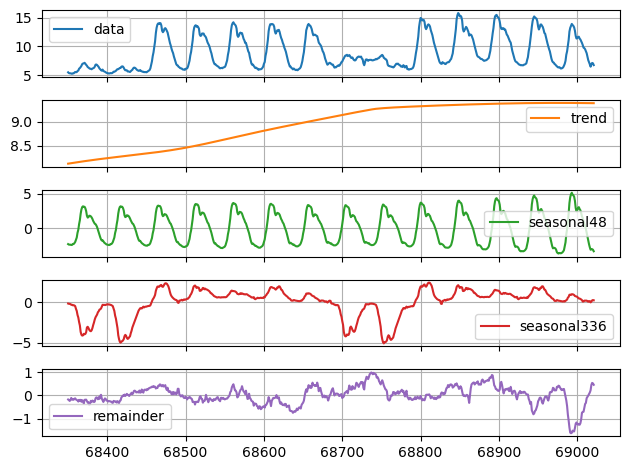

In [20]:
import matplotlib.pyplot as plt

sf.fitted_[0, 0].model_.tail(24 * 28).plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()